In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 1. Работа с массивами NumPy

**N. Все упражнения ниже нужно делать без использования циклов Python**

**1.** Cоздать вектор

$$(2, \frac{2^2}{2}, \ldots, \frac{2^{20}}{20})$$

Можно использовать функции [np.arange()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html), [np.ones()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html)

In [6]:
## your code
2 ** np.arange(1, 21) / np.arange(1, 21)

array([2.00000000e+00, 2.00000000e+00, 2.66666667e+00, 4.00000000e+00,
       6.40000000e+00, 1.06666667e+01, 1.82857143e+01, 3.20000000e+01,
       5.68888889e+01, 1.02400000e+02, 1.86181818e+02, 3.41333333e+02,
       6.30153846e+02, 1.17028571e+03, 2.18453333e+03, 4.09600000e+03,
       7.71011765e+03, 1.45635556e+04, 2.75941053e+04, 5.24288000e+04])

**2.** Посчитать:

$$\sum\limits_{i=0}^{5}{0.1^{3i}0.2^{4i}}$$


In [8]:
## your code
np.sum(0.1 ** (3 * np.arange(6)) * 0.2 ** (4 * np.arange(6)))

1.00000160000256

**3.** Создать нулевую матрицe $8 \times 8$, и заполнить её единицами в шахматном порядке.

In [15]:
## your code
a = np.zeros((8, 8))
a[0::2, 0::2] = 1
a[1::2, 1::2] = 1
a

array([[1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.]])

**4.** Есть 5 точек в декартовой системе координат (в виде матрицы $X$ размерностью $5 \times 2$), сконвертируйте эти точки в полярную систему координат.

In [24]:
X = np.random.random((5, 2))

(array([[0.81799283, 0.7653215 ],
        [0.16267089, 0.63302724],
        [0.95626279, 0.84599592],
        [0.6180711 , 0.03430071],
        [0.8162486 , 0.33999057]]),
 array([0.7653215 , 0.63302724, 0.84599592, 0.03430071, 0.33999057]))

In [28]:
X = np.random.random((5, 2))

## your code
np.hstack((np.sqrt(X[:, 0] ** 2 + X[:, 1] ** 2).reshape(-1, 1), np.arctan(X[:, 1] / X[:, 0]).reshape(-1, 1)))

array([[0.97588425, 1.2012314 ],
       [0.31141045, 0.21742916],
       [0.51012436, 0.43454961],
       [0.63163416, 0.54651952],
       [0.81165097, 0.06490853]])

**5.** Найдите индексы максимального элемента в случайной матрице $10 \times 10$.

Cм. [np.argmax()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html).

In [40]:
#X = np.random.random((10, 10))

## your code
np.unravel_index(np.argmax(X), X.shape)

(3, 1)

**6.** Есть 10 точек ($X$) и ещё одна ($y$). Найти в $X$ ближайшую к $y$ точку.

In [50]:
X = np.random.random((10, 2))
y = np.random.random((1, 2))

## your code
X, y, X[np.argmin(np.linalg.norm(X - y, axis=1))]

(array([[0.09601594, 0.11347273],
        [0.94981396, 0.40200751],
        [0.17911979, 0.23628732],
        [0.94613282, 0.21177836],
        [0.03009321, 0.86955739],
        [0.4230272 , 0.64241683],
        [0.790683  , 0.8201309 ],
        [0.59686617, 0.52390222],
        [0.49282342, 0.64533   ],
        [0.1017316 , 0.55963815]]),
 array([[0.95434475, 0.25540079]]),
 array([0.94613282, 0.21177836]))

**7.** Дана функция:

$$
 \begin{cases}
    x^2 + 2x + 6, & x < 0  \\
    x + 6, & 0 \le x \le 2 \\
    x^2 + 4x - 4, & x \ge 2
 \end{cases}
$$

Постройте массив из её значений на  $-3 \le x \le 3$.

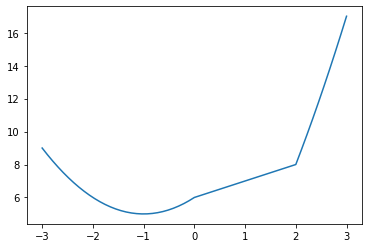

In [62]:
## your code
X1 = np.linspace(-3, 0, 30)[:-1]
X2 = np.linspace(0, 2, 20)[:-1]
X3 = np.linspace(2, 3, 10)
Y = np.concatenate((X1 ** 2 + 2 * X1 + 6, X2 + 6, X3 ** 2 + 4 * X3 - 4))
plt.plot(np.concatenate((X1, X2, X3)), Y);

**8.** Из каждого элемента матрицы вычесть среднее арифметическое от всех элементов в соответствующей строке (после чего среднее значение каждой строки должно равняться нулю).

Cм. [np.mean()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html).

In [73]:
X = np.random.random((10, 10))

## your code
X - np.mean(X, axis=1).reshape(-1, 1), \
np.mean(X - np.mean(X, axis=1).reshape(-1, 1), axis=1)

(array([[-0.50106442,  0.19207277, -0.03040948, -0.05319276, -0.30231001,
         -0.3975956 ,  0.34275958,  0.40324771,  0.12175055,  0.22474165],
        [ 0.24237455, -0.08270083,  0.16769073,  0.04786926,  0.19771458,
         -0.39880191, -0.07788688, -0.24010016, -0.05695789,  0.20079856],
        [-0.16701789,  0.36705356, -0.38588901, -0.30027354,  0.45302081,
         -0.03882843,  0.24711537, -0.3491944 ,  0.25362219, -0.07960866],
        [-0.24820812, -0.24681508,  0.21290173, -0.14612999,  0.41029831,
          0.09905037,  0.38092026,  0.1485177 , -0.22981989, -0.38071529],
        [-0.32467985,  0.20930004, -0.34860261,  0.20890197, -0.32025141,
          0.18391964,  0.42046206,  0.20569152, -0.21050635, -0.02423501],
        [ 0.33081443, -0.393142  , -0.16241067,  0.4388385 , -0.32783487,
          0.08243265, -0.30094134, -0.19746994,  0.25596545,  0.27374779],
        [-0.11171119,  0.33228654, -0.35073184,  0.06689438, -0.34074545,
         -0.33018098, -0.0764319

**9.** Есть массив из 1000 чисел, полученных из генератора случайных чисел, имеющий нормальное распределение. Посчитайте выборочное среднее и выборочную дисперсию. 

In [75]:
X = np.random.normal(loc=5, scale=2., size=1000)
np.mean(X), np.var(X)

(4.988751368511308, 4.014060943546341)

**10.** Создать матрицу:

$$
\begin{pmatrix}
0 & 1 & 2 & 3 & 4 \\
1 & 2 & 3 & 4 & 0 \\
2 & 3 & 4 & 0 & 1 \\
3 & 4 & 0 & 1 & 2 \\
4 & 0 & 1 & 2 & 3
\end{pmatrix}
$$

In [40]:
## your code
np.fromfunction(lambda i, j: i + j, (5, 5)) % 5

array([[0., 1., 2., 3., 4.],
       [1., 2., 3., 4., 0.],
       [2., 3., 4., 0., 1.],
       [3., 4., 0., 1., 2.],
       [4., 0., 1., 2., 3.]])

**11.** Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [137]:
def sample(x, c):
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1
            
        res.append(idx)
    return res

            
sample([50, 3, 1, 7, 20], 5)    

[0, 1, 0, 0, 0]

Реализуйте данный алгоритм более оптимальным способом, без использования циклов.

In [ ]:
def sample_2(x, c, vals):
    assert len(x) > 0
    s = np.sum(x)
    res = []
    vals = s * np.random.random(c)
    V = np.sum(np.tril(np.ones((5,5))) * x, axis=1, dtype=int).reshape(-1, 1)
    return np.sum(np.less_equal(V, vals), axis=0)

In [77]:
# Test

def sample(x, c):
    assert len(x) > 0
    vals = []
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        vals.append(val)
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1
            
        res.append(idx)
    return res, vals

def sample_2(x, c, vals):
    assert len(x) > 0
    s = np.sum(x)
    res = []
    #vals = s * np.random.random(c)
    V = np.sum(np.tril(np.ones((5,5))) * x, axis=1, dtype=int).reshape(-1, 1)
    return list(np.sum(np.less_equal(V, vals), axis=0))

def test():
    for _ in range(1000):
        x = np.random.randint(1, 100, 20)
        c = 20
        s1, vals = sample(A, c)
        s2 = sample_2(A, c, vals)
        assert s1 == s2

In [78]:
test()